# Complexity, Accuracy, and Choas: Exploring Overfitting with Linear and Polynomial Regression Models

In this notebook, we'll work with a housing dataset to explore how different types of regression -- including both **linear** and **polynomial** -- impact model fit, performance, and the risk of **overfitting**. Along the way, we'll dig into Scikit-learn's **Pipeline** and **GridSearchCV**, and learn all about the trade-off between model complexity and accuracy. As we'll see, complexity doens't *always* lead to power -- sometimes, it introduces **noise, variance, and *chaos***.

Here's the path we'll follow:

**The Pipeline:**

- Load and explore the dataset
- Set X and y, the feature and target
- Visualize the relationship between feature and target variables
- Import and fit the model
- View model parameters and performance
- Predict the price for a given house
- Visualize the regression line
- Evaluate model performance with error metrics
- Add polynomial features to the model
- View the polynomial model's learned parameters and performance
- Build a pipeline
- Visualize the new, polynomial regression line
- Re-run the model with higher polynomial terms
- Find the best polynomial degree with Grid Search, plus takeaways and observations
- Use multiple features to build a linear regression model


**Acknowledgements**

This notebook is built on top of a lecture by Tao Li, Associate Professor in the Department of Information & Analytics at the Leavey School of Business at Santa Clara University. Thanks to the professor for designing lectures that inspire further exploration.

## Load and explore the dataset

In [1]:
# Begin by importing numpy and pandas for data analysis and manipulation
import numpy as np
import pandas as pd

In [2]:
# Load the dataset as a DataFrame
housing = pd.read_csv("datasets/House.txt", header = None, names=['Size', 'Bedrooms', 'Price'])
housing.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
# Use .info() to get a quick summary of the DataFrame
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Size      47 non-null     int64
 1   Bedrooms  47 non-null     int64
 2   Price     47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [4]:
# Just for fun, confirm there are no NaN values
housing.isna().sum()

Size        0
Bedrooms    0
Price       0
dtype: int64

In [5]:
# Use .describe() to get the summary statistics
housing.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


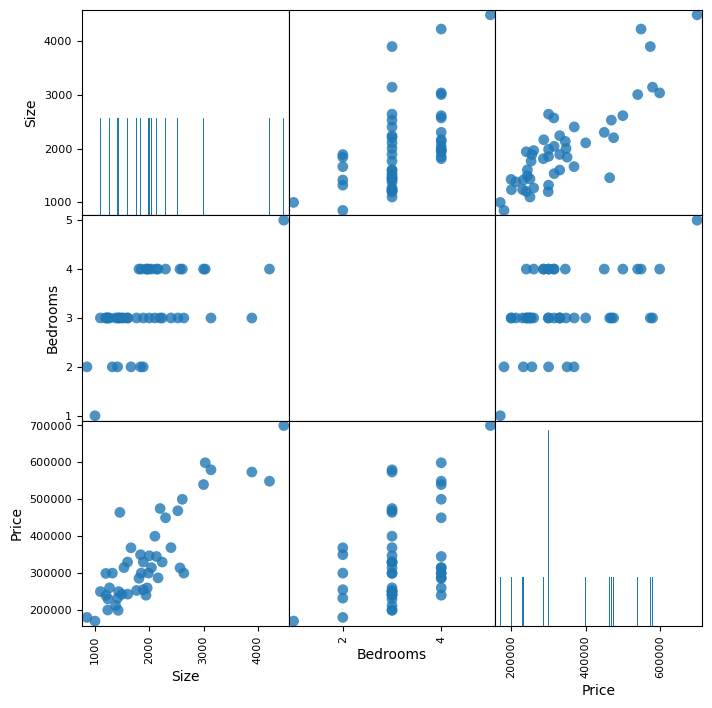

In [6]:
# Import matplotlib for plotting
%matplotlib inline
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(housing, figsize=(8, 8),
                           marker='o', hist_kwds={'bins': 550}, s=60,
                           alpha=.8)
# Display the plots
plt.show()

## Set X and y, the feature and target

In [7]:
# Set X, the feature variable, or the Size Series from the dataset
# Use the double brackets to durn it into a DataFrame, as needed for scikitlearn
X = housing[["Size"]]

In [8]:
# Check the shape of X
X.shape

(47, 1)

In [9]:
# Check the type
type(X)

pandas.core.frame.DataFrame

In [10]:
# Set y, the target variable or what we are trying to predict
y = housing.Price

In [11]:
# Check the shape of y
y.shape

(47,)

In [12]:
# Check the type
type(y)

pandas.core.series.Series

## Visualize the relationship between feature and target variables

This scatter plot shows the relationship between the feature value (x) and the target value (y) for a least-squares linear regression task. In very intuitive terms, this plot shows how big *each* house is and how much it costs. As always: **Plot first, model second**.

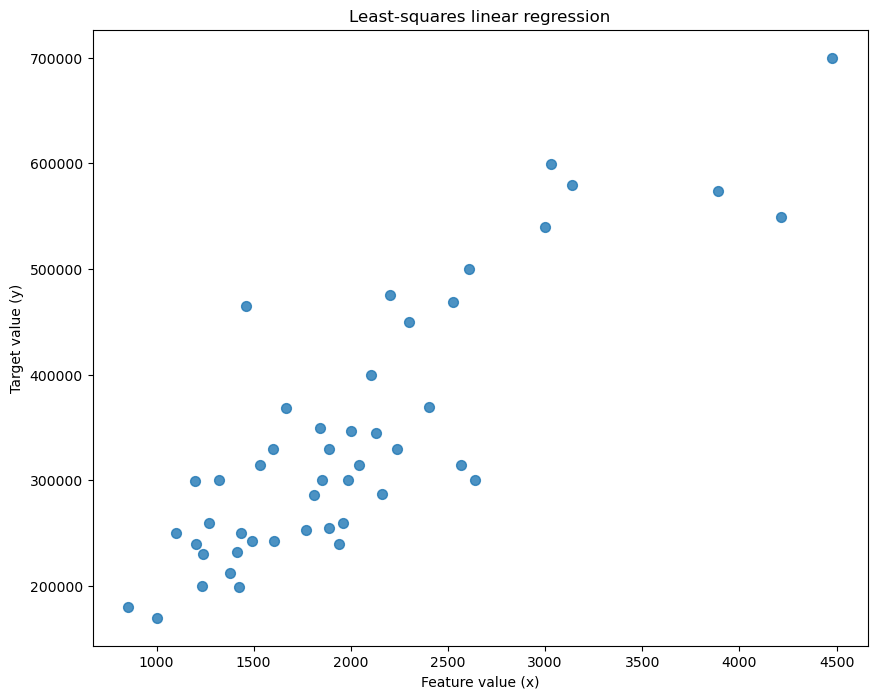

In [13]:
# Create the scatter plot

plt.figure(figsize=(10,8)) # Set the size as specified
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8) # Plot a scatter plot of feature vs. target values
plt.title('Least-squares linear regression') # Set the plot title
plt.xlabel('Feature value (x)') # Set the x-label
plt.ylabel('Target value (y)') # Set the y-label

# Display the plot
plt.show()

## Import and fit the model

Now, it's time to import and fit the model. What the model will do is find the line that makes the vertical error (from each point to the line) as *small* as possible. But instead of minimizing the raw errors, it minimizes the sqaures of those errors -- so that positive and negative numbers don't cancel each other out.

In [14]:
# Import the Linear Regression model from sklearn linear model
from sklearn.linear_model import LinearRegression

# Create a LinearRegression object and fit it to the data
# This estimates coefficients that best fit the data using least sqaures
linreg = LinearRegression().fit(X, y)
linreg

LinearRegression()

## View model parameters and performance

Next, we'll take a look at our learned parameters: **coefficient (w)**, **intercept (b)** and the **R-squared score**.

In [15]:
# Print the learned model parameters
# Display the slope (coefficient w), or how much price increases per sqaure foot
print('linear model coeff (w): {}'
     .format(linreg.coef_))

# Display the intercept, or (b), the predicted price when size = 0
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))

# Display the R-sqaured score, or how well the model explains the variance in price
# Note: The closer to 1, the stronger the model's explanatory power
print('R-squared score: {:.3f}'
     .format(linreg.score(X, y)))

linear model coeff (w): [134.52528772]
linear model intercept (b): 71270.492
R-squared score: 0.731


**Here's how to contextualize the R-sqaured score**: About 73% of the variation in house prices is explained by house size.
The rest (27%) is due to other factors, like bedrooms, location, age, and so on.

## Predict the price for a given house

In [16]:
# Set a new X of 3,000 square feet
X_new = [[3000]]

In [17]:
# Use the .predict() method to apply the trained model and forecast the price of X_new
linreg.predict(X_new)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([474846.35560945])

## Visaulize the regression line

To understand how *well* the model fits the data, we can visualize the regression line on top of the actual data points.  
Each blue dot represents a house (its size and price), and the red line represents the model's predicted relationship based on least-squares linear regression.

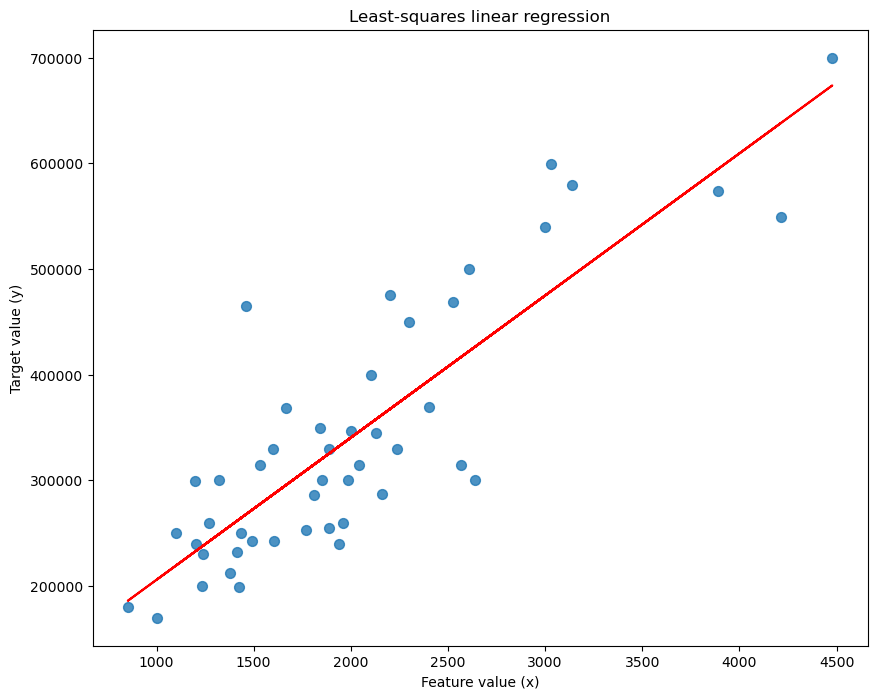

In [18]:
# Create the plot

plt.figure(figsize=(10,8)) # Set the plot size
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8) # Plot the original data points, or house size vs. price
plt.plot(X, linreg.coef_ * X + linreg.intercept_, 'r-') # Plot the regression line using the learned slope (w) and intercept (b)

# Add the tittles and axis lales
plt.title('Least-squares linear regression') # Set the title
plt.xlabel('Feature value (x)') # This is the house size in square feet
plt.ylabel('Target value (y)') # This is the house price in dollars

# Display the plot
plt.show()

Now, we'll generate the exact same plot using **.predict() from scikit-learn**.

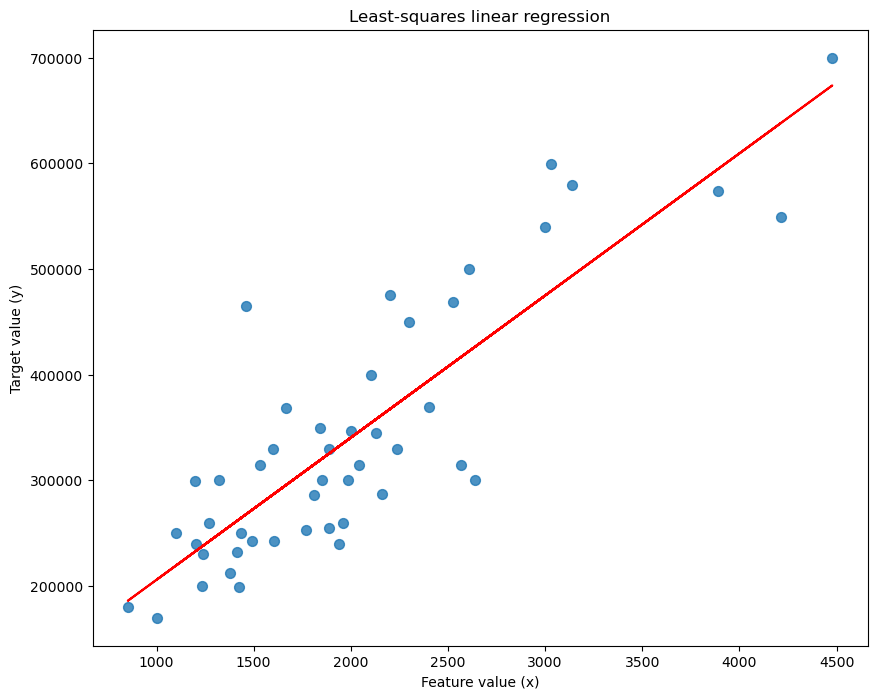

In [19]:
# Create the plot again

plt.figure(figsize=(10,8)) # Set the plot size 
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8) # Plot the original data points, or house size vs. price
plt.plot(X, linreg.predict(X), 'r-') # Add the regression line using .predict()

# Add the titles and labels
plt.title('Least-squares linear regression') # Set the title
plt.xlabel('Feature value (x)') # Set the x-label
plt.ylabel('Target value (y)') # Set the y-label
plt.show()

## Evaluate model performance with error metrics

To figure out how well our model is predicting housing prices we'll calculate a couple of common error metrics:
- **Root Mean Squared Error (RMSE)**: How far off predictions are, on average -- with larger errors penalized more
- **Mean Absolute Error (MAE)**: The average *absolute* difference between predicted and actual prices

In [20]:
# Import the mean squared error function from sklearn
from sklearn.metrics import mean_squared_error

# Generate predictions from our model
housing_predictions = linreg.predict(X)

# Calculate Mean Sqaured Error, or MSE, which is the average of squared prediction errors
lin_mse = mean_squared_error(y, housing_predictions)

# Now, take the square root of MSE to get Root Mean Squared Error or RMSE
# RMSE is in the same units as the target (dollars) and gives a sense of average error
lin_rmse = np.sqrt(lin_mse)
lin_rmse

64158.128720109074

The **RMSE** tells us that, on average, our model’s predictions are about **$64,158** off from the actual house prices.  
Since RMSE penalizes larger errors more than smaller ones, it’s useful when big misses matter.

In [22]:
# Import the mean absolute error function
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error, or MAE, which is the average absolute difference between predicted and actual prices
lin_mae = mean_absolute_error(y, housing_predictions)
lin_mae

52004.8139986077

The **MAE** gives us a more direct answer: on average, our predictions are about **$52,005** off.  
Unlike RMSE, this treats all errors equally, so it’s often easier to interpret.

## Add polynomial features to the model

By adding **polynomial features** to our model, we will allow our linear model to fit *nonlinear* relationships.

In [23]:
# Import Polynomial Features from scikit-learn
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features to the order of three
# Note: We are specifying that parameter by saying degree=3
poly3 = PolynomialFeatures(degree=3, include_bias=False)

# Use the .fit_transform() method to create the extra features
# Note: In the first row, we effectively have X1 (the size of the first house), X1^2and X1^3; So,
# we've added the sqaured value of the hosue size and the cubed value
X_poly = poly3.fit_transform(X)
X_poly

array([[2.10400000e+03, 4.42681600e+06, 9.31402086e+09],
       [1.60000000e+03, 2.56000000e+06, 4.09600000e+09],
       [2.40000000e+03, 5.76000000e+06, 1.38240000e+10],
       [1.41600000e+03, 2.00505600e+06, 2.83915930e+09],
       [3.00000000e+03, 9.00000000e+06, 2.70000000e+10],
       [1.98500000e+03, 3.94022500e+06, 7.82134662e+09],
       [1.53400000e+03, 2.35315600e+06, 3.60974130e+09],
       [1.42700000e+03, 2.03632900e+06, 2.90584148e+09],
       [1.38000000e+03, 1.90440000e+06, 2.62807200e+09],
       [1.49400000e+03, 2.23203600e+06, 3.33466178e+09],
       [1.94000000e+03, 3.76360000e+06, 7.30138400e+09],
       [2.00000000e+03, 4.00000000e+06, 8.00000000e+09],
       [1.89000000e+03, 3.57210000e+06, 6.75126900e+09],
       [4.47800000e+03, 2.00524840e+07, 8.97950234e+10],
       [1.26800000e+03, 1.60782400e+06, 2.03872083e+09],
       [2.30000000e+03, 5.29000000e+06, 1.21670000e+10],
       [1.32000000e+03, 1.74240000e+06, 2.29996800e+09],
       [1.23600000e+03, 1.52769

Once again, we'll use a linear regression model to fit our new feature, X_poly, to our label, y.

In [24]:
# Define and fit a linear regression model using the transformed polynomial features
linreg2 = LinearRegression().fit(X_poly, y)
linreg2

LinearRegression()

## View the polynomial model's learned parameters and performance

In [27]:
# Display model parameters and performance metrics
# Print coefficient (w), how much each polynomial term impacts predicted price
print('linear model coeff (w): {}'
     .format(linreg2.coef_))

# Print the intercept (b), or the predicted price when all input features are 0
print('linear model intercept (b): {:.3f}'
     .format(linreg2.intercept_))

# Display the R-sqaured score, or how well the model explains the variance in price
# Note: The closer to 1, the stronger the model's explanatory power
print('R-squared score: {:.3f}'
     .format(linreg2.score(X_poly, y)))

linear model coeff (w): [-1.07855433e+02  1.06190390e-01 -1.38299982e-05]
linear model intercept (b): 236407.036
R-squared score: 0.738


**Observation**: By adding in the polynomial features, the R-squared score went up ever so slightly -- from **0.731** to **0.738**. This makes a lot of sense as we would expect that house size would have a largely linear relationship with price. After all, big houses tend to cost more than small ones.

## Build a pipleine 

Now, it's time to  build a **pipeline** to streamline our model steps: 1) transform, 2) scale, and 3) predict.

In [28]:
# Import the Pipeline method from scikit-learn
from sklearn.pipeline import Pipeline

# Import the StandardScaler method from sckit-learn
# For now, we are treating scaler as a black box, but in simple terms, it's used for standardizing features,
# so, mean = 0 and standard deviation = 1
from sklearn.preprocessing import StandardScaler

# Intialize the scaler to standardize features
scaler = StandardScaler()

# Use pipeline to fit our model
# Within this pipeline we have three steps 1) to create the polynomial features, 2) to normalize all the features 
# and 3) to run the linear regression
pipeline_reg = Pipeline([('poly', poly3), ('scal', scaler), ('lin', linreg)])

# Finally, fit the model using our dataset
pipeline_reg.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('scal', StandardScaler()), ('lin', LinearRegression())])

## Visualize the new, polynomial regression line

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


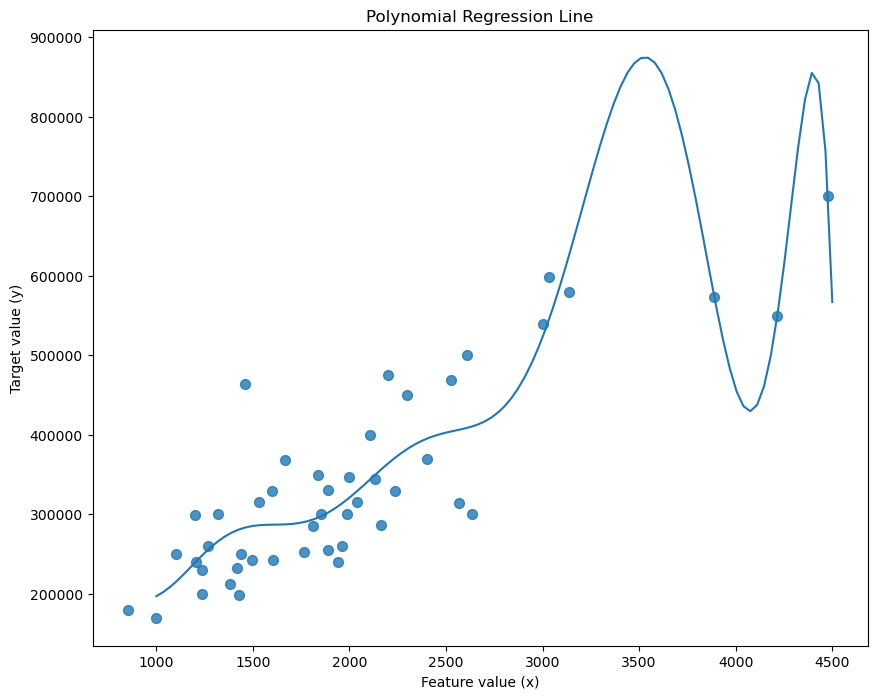

In [93]:
# Create the new plot

plt.figure(figsize=(10,8)) # Set the plot size 
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8) # Plot the original data points (scatter plot of actual house size vs. price)
X1 = np.linspace(1000, 4500, 100) # Generate a smooth range of house sizes (100 values between 1000 and 4500 sqft)
curve = pipeline_reg.predict(X1[:, np.newaxis]) # Use the pipeline -- with polynomial features and scaling -- to predict prices for X1

# Plot the polynomial regression curve
plt.plot(X1, curve)

# Set the title and labesl
plt.title('Polynomial Regression Line') # Set the chart title
plt.xlabel('Feature value (x)') # Set the x-label
plt.ylabel('Target value (y)') # Set the y-label

# Display the plot
plt.show()

## Re-run the model with higher polynomial terms

Next, we're going to see if we can improve our prediction by using higher polynomial terms. The only difference with this new model is that the `degree=10` as opposed to `degree=3` before.

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
R-squared score: 0.789


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


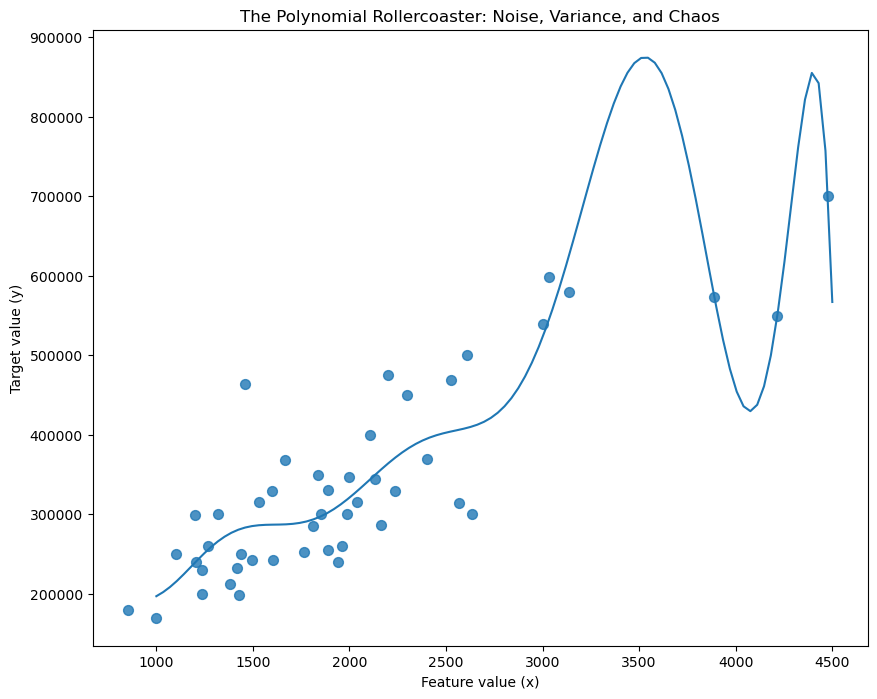

In [92]:
# We are repeating the same model-building process but with a higher order
# Note: Now, degree=10 -- as opposed to 3 before!
poly10 = PolynomialFeatures(degree=10, include_bias=False)

# The rest of the code is the exact same as we saw above
scaler = StandardScaler() # Initialize scaler to standardize the features
lin_reg2 = LinearRegression() # Intialize the model

# Use pipeline to fit our model
# Note: We must specify those 3 steps, as above
pipeline_reg = Pipeline([('poly', poly10), ('scal', scaler), ('lin', lin_reg2)])

# Finally, fit the model using our dataset
pipeline_reg.fit(X, y)

# Dsiplay the R-squared score for our new model to the degree of 10
print('R-squared score: {:.3f}'
     .format(pipeline_reg.score(X, y)))

# Create the plot visulize it
plt.figure(figsize=(10,8)) # Set the plot size
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8) # Plot the original data points, or housing size and price

X1 = np.linspace(1000, 4500, 100) # Generate a smooth range of house size, specifically 100 values between 1000 and 4500 sqft
curve = pipeline_reg.predict(X1[:, np.newaxis]) # Use the pipeline -- with polynomial features and scaling -- to predict prices for X1

# Plot the polynomial regression curve
plt.plot(X1, curve)

# Set the title and labels
plt.title('The Polynomial Rollercoaster: Noise, Variance, and Chaos') # Set the title
plt.xlabel('Feature value (x)') # Set the x-label
plt.ylabel('Target value (y)') # Set the y-label

# Display the plot
plt.show()

The R-squared score has jumped up to nearly **79%**, which tells us the model can fit the training data better, but that might actually be a problem.

We can immediately see that this new polynomial regression line is like a **roller coaster of overfitting** and is poised to cause all sorts on problems when we see how the model generalizes to new, unseen data.

## Find the best polynomial degree with Grid Search, plus takeaways and observations

In [32]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the data set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

Next, we'll import GridSearchCV, another useful package from scikit-learn that allows us to different polynomial degrees. We'll also import make_pipeline, which steamlines the pipeline building process.

In [35]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Import make_pipeline
from sklearn.pipeline import make_pipeline

# Use .make_pipeline
# Notice that the three steps we see below correspond to the pipeline we built before!
pipe = make_pipeline(PolynomialFeatures(), StandardScaler(),LinearRegression())

# Create a grid of hyperparameters: We're asking GridSearch to test degrees 1 through 9
# Note: It's like a for loop that tries different polynomial complexities automatically!; It's like
# having a mini for lip set as a parameter!
param_grid = {'polynomialfeatures__degree': range(1,10)}

# Set up GridSearcCV to evaluate each degree using 5-fold croos-validation and return training scores, too!
# Note: The CV parameter is what tells scikit-learn to run cross validation and how many times
# And n_jobs=-1 tells the computer to use all available CPU cores to speed up the grid search
# Finally, return_trainig_score=True ensures that we will still see the training scores
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1,return_train_score=True)

# Fit the grid using the training set
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1, param_grid={'polynomialfeatures__degree': range(1, 10)},
             return_train_score=True)

Now, to compare the results, which go from 1-9 as specified above -- check out the **param_polynomialfeatures__degree** column . We are also interested in analyzing the **mean_train_score**.

In [53]:
# Create a DataFrame to display and compare the results
# Note: We are comparing the different polynimial degrees as see in this column: 'param_polynomialfeatures__degree'
df_grid = pd.DataFrame(grid.cv_results_)
df_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005964,0.000957,0.001376,0.000044,1,{'polynomialfeatures__degree': 1},-0.723992,0.867068,0.818599,0.853010,...,0.512328,0.619555,1,0.854966,0.669916,0.714149,0.711040,0.726891,0.735392,0.062772
1,0.007869,0.002204,0.002012,0.000328,2,{'polynomialfeatures__degree': 2},-0.717951,0.862138,0.750534,0.863544,...,0.478220,0.604111,2,0.854979,0.669998,0.727116,0.712918,0.750267,0.743056,0.061772
2,0.004659,0.001529,0.001937,0.000450,3,{'polynomialfeatures__degree': 3},-0.791496,0.769845,0.749826,0.864037,...,0.435328,0.619989,4,0.859067,0.679721,0.727491,0.712924,0.755843,0.747009,0.061164
3,0.003983,0.001377,0.002447,0.001264,4,{'polynomialfeatures__degree': 4},-0.849768,0.224321,0.690244,0.863572,...,0.302272,0.612806,6,0.860222,0.705952,0.733226,0.713374,0.755970,0.753748,0.055995
4,0.003769,0.000720,0.001462,0.000205,5,{'polynomialfeatures__degree': 5},-1.114811,0.533122,0.776586,0.880685,...,0.344997,0.739232,5,0.902149,0.708523,0.755324,0.740356,0.758949,0.773060,0.066951
5,0.003712,0.000953,0.001670,0.000549,6,{'polynomialfeatures__degree': 6},-0.940265,0.908956,0.832567,0.869843,...,0.474673,0.710872,3,0.914946,0.719592,0.768026,0.761535,0.763675,0.785555,0.067017
6,0.003849,0.001225,0.001425,0.000212,7,{'polynomialfeatures__degree': 7},-1.019460,-5.858813,0.088048,-0.356287,...,-1.387696,2.276596,7,0.916415,0.731400,0.775563,0.778905,0.768579,0.794172,0.063432
7,0.003686,0.000429,0.001571,0.000180,8,{'polynomialfeatures__degree': 8},-0.924715,-511.369999,-52.481350,-17.894188,...,-121.528189,195.628554,8,0.916924,0.757669,0.798109,0.792865,0.818342,0.816782,0.053751
8,0.003655,0.000569,0.001485,0.000276,9,{'polynomialfeatures__degree': 9},-2.533707,-28795.299881,-2202.249681,-696.434813,...,-6342.113542,11255.153515,9,0.920297,0.803296,0.830079,0.820760,0.826116,0.840110,0.041125


### Important observations from the Grid Search results

The **mean_train_score** is going up and up and up because we are increasing the model complexity and fitting the training data bettter but also introducing **overfitting**. Plus, we ultimately care more about the performance on the testing data, or **mean_test_score**. And, as we can see above, those scores are decreasing as we move down the DataFrame. **So, as we increase model compelexity, performance on the testing data is descreasing**.

Finally, the **rank_test_score** columns shows that **the first model -- our linear regession -- is the best**. In short: The simplest model wins.

Now, Let’s confirm the test set performance of the **best model** GridSearchCV selected,  which in this case, is just plain linear regression (degree=1).

In [65]:
# Score the best model from GridSearch, which turned out to be linear regression, on the test set
print("Score with poly features: {:.2f}".format(grid.score(X_test, y_test)))

Score with poly features: 0.66


## Final takeaways from the Grid Search

So, as we see above, our simple linear model not only performed best during grid search -- but it performed even better on the final test set. What's more, some of those polynomial models -- with *negative* mean_test_scores -- were disastrous, worse than simply pulling a name out of a hat. Even though polynomial models *seem* more powerful, sometimes all they do is introduce **noise, variance and *chaos*** when a simple linear model would do the trick.

## Use multiple features to build a linear regression model

To wrap up this notebook, we'll quickly walk through the process of building a linear regression model with *multiple* features.

In [87]:
# Set X, the feature variables as 'Size' AND 'Bedrooms'
X_multiple = housing[["Size","Bedrooms"]]

In [88]:
# Check the shape of X
X_multiple.shape

(47, 2)

In [89]:
# Now split the training and test sets using the default 75/25 split for training and test
X_train, X_test, y_train, y_test = train_test_split(
    X_multiple, y, random_state=0)

In [90]:
# Use make_pipeline to build the three steps: 1) PolynomialFeatues, 2) Standard Scaler and 3) LinearRegression
pipe = make_pipeline(PolynomialFeatures(), StandardScaler(),LinearRegression())

# Compare the degree of polyniomial features friom 1 to 9
param_grid = {'polynomialfeatures__degree': range(1,10)}

# Use GridSearchCV to compare the hyperparameters and run 5-fold cross validation
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1,return_train_score=True)

# Finally fit the grid using the training set
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1, param_grid={'polynomialfeatures__degree': range(1, 10)},
             return_train_score=True)

In [85]:
# Create the DataFrame to compare the results
df_multiple_grid = pd.DataFrame(grid.cv_results_)
df_multiple_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004400,0.000927,0.001113,0.000272,1,{'polynomialfeatures__degree': 1},-0.723992,0.867068,0.818599,0.853010,...,0.512328,0.619555,1,0.854966,0.669916,0.714149,0.711040,0.726891,0.735392,0.062772
1,0.004143,0.001262,0.001043,0.000311,2,{'polynomialfeatures__degree': 2},-0.717951,0.862138,0.750534,0.863544,...,0.478220,0.604111,2,0.854979,0.669998,0.727116,0.712918,0.750267,0.743056,0.061772
2,0.002481,0.000538,0.001100,0.000376,3,{'polynomialfeatures__degree': 3},-0.791496,0.769845,0.749826,0.864037,...,0.435328,0.619989,4,0.859067,0.679721,0.727491,0.712924,0.755843,0.747009,0.061164
3,0.001877,0.000248,0.000927,0.000179,4,{'polynomialfeatures__degree': 4},-0.849768,0.224321,0.690244,0.863572,...,0.302272,0.612806,6,0.860222,0.705952,0.733226,0.713374,0.755970,0.753748,0.055995
4,0.002142,0.000457,0.001011,0.000425,5,{'polynomialfeatures__degree': 5},-1.114811,0.533122,0.776586,0.880685,...,0.344997,0.739232,5,0.902149,0.708523,0.755324,0.740356,0.758949,0.773060,0.066951
5,0.002992,0.000663,0.001285,0.000287,6,{'polynomialfeatures__degree': 6},-0.940265,0.908956,0.832567,0.869843,...,0.474673,0.710872,3,0.914946,0.719592,0.768026,0.761535,0.763675,0.785555,0.067017
6,0.002587,0.000362,0.001497,0.000681,7,{'polynomialfeatures__degree': 7},-1.019460,-5.858813,0.088048,-0.356287,...,-1.387696,2.276596,7,0.916415,0.731400,0.775563,0.778905,0.768579,0.794172,0.063432
7,0.002014,0.000805,0.000931,0.000465,8,{'polynomialfeatures__degree': 8},-0.924715,-511.369999,-52.481350,-17.894188,...,-121.528189,195.628554,8,0.916924,0.757669,0.798109,0.792865,0.818342,0.816782,0.053751
8,0.001960,0.000288,0.000929,0.000162,9,{'polynomialfeatures__degree': 9},-2.533707,-28795.299881,-2202.249681,-696.434813,...,-6342.113542,11255.153515,9,0.920297,0.803296,0.830079,0.820760,0.826116,0.840110,0.041125


Just as we saw above, once again the simplest model is the best -- as measured by **mean_test_score**.

In [91]:
# Finally, we'll fit this grid to the testing data to check the score
print("Score with poly features: {:.2f}".format(grid.score(X_test, y_test)))

Score with poly features: 0.65


And there it is -- one last example of **overfitting in action**. When we increased the complexity of our model by using house size *and* bedrooms, the performance of the model on the test set went down ever so slighty, from **0.66** to **0.65**. 

So, it turns out using *just* house size is better than using both features.